<a href="https://colab.research.google.com/github/GoldFiiish/dataAugmentation/blob/main/anothercycleapple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle
 from google.colab import files 

 #account>>API>>Expire API token>>>>Create...
 files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alibahari","key":"a9e92d5053e391494f132ef2b0ce2679"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d suyashdamle/cyclegan
! mkdir dataset
! unzip cyclegan.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-12 11:31:32.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-12 12:30:32.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-12 19:51:27.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-12 20:53:44.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-12 21:31:48.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-13 09:22:26.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-13 10:07:16.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-13 13:57:11.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-13 16:02:50.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-13 16:45:49.jpg  
  inflating: dataset/vangogh2photo/vangogh2photo/trainB/2015-02-14 00:09:27.jpg  
  inflating: dataset/vangogh2photo/vangogh2phot

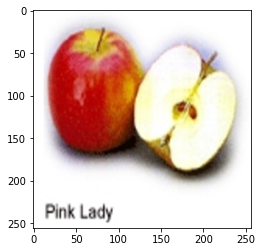

In [ ]:
>>> import matplotlib.pyplot as plt
>>> import matplotlib.image as mpimg
>>> image = mpimg.imread("/content/dataset/apple2orange/apple2orange/testA/n07740461_10011.jpg")
>>> plt.imshow(image)
>>> plt.show()

In [ ]:
import tensorflow as tf
!pip install git+https://www.github.com/keras-team/keras-contrib.git
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-zvb6cdtv
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-zvb6cdtv
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101066 sha256=6453869bdbaa2fd7de08e9f69a72e2b27e9eea00a1941fdf2d112ca68499d1a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-xsi7frr6/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.utils.vis_utils import plot_model
 
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_image = Input(shape=image_shape)
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	# define model
	model = Model(in_image, patch_out)
	# compile model
	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
	return model
 
# define image shape
image_shape = (256,256,3)
# create the model
model = define_discriminator(image_shape)
# summarize the model
#model.summary()
# plot the model
#plot_model(model, to_file='discriminator_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
"""def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g"""

"def resnet_block(n_filters, input_layer):\n\t# weight initialization\n\tinit = RandomNormal(stddev=0.02)\n\t# first layer convolutional layer\n\tg = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)\n\tg = InstanceNormalization(axis=-1)(g)\n\tg = Activation('relu')(g)\n\t# second convolutional layer\n\tg = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)\n\tg = InstanceNormalization(axis=-1)(g)\n\t# concatenate merge channel-wise with input layer\n\tg = Concatenate()([g, input_layer])\n\treturn g"

In [ ]:
from keras.optimizers import Adam
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Activation
from keras.initializers import RandomNormal
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.utils.vis_utils import plot_model
 
# generator a resnet block
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g
 
# define the standalone generator model
def define_generator(image_shape=(256,256,3), n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model
 
# create the model
model = define_generator()
# summarize the model
#model.summary()
# plot the model
#plot_model(model, to_file='generator_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
"""
model = define_generator()
z=np.zeros((1,256,256,3))
zz = model.predict(z)"""

'\nmodel = define_generator()\nz=np.zeros((1,256,256,3))\nzz = model.predict(z)'

In [ ]:
image_shape = (256,256,3)
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)

In [ ]:
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	return model

In [ ]:
c_model_AtoBtoA = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoAtoB = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)

In [ ]:
from random import randint
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	#ix = randint(0, dataset.shape[0], n_samples)   randint need 2 argument and automaticaly python
  #produce the third one.... n_sample ham ke 1 hast.... pas hamon miaim 0 , tedade dade haro behesh 
  #midim ke ye chize random oon vasat tolid kone.
	ix = randint(0, (dataset.shape[0]-1))
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, patch_shape, patch_shape, 1))
	return X, y

In [ ]:
#X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)

def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = np.zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [ ]:
"""from PIL import Image
from numpy import asarray
# load the image
trainA = Image.open('/content/dataset/apple2orange/apple2orange/trainA/n07740461_10012.jpg')
# convert image to numpy array
trainA = asarray(trainA)
trainB = Image.open('/content/dataset/apple2orange/apple2orange/trainB/n07749192_1004.jpg')
# convert image to numpy array
trainB = asarray(trainB)
print(type(trainB))
# summarize shape
print(trainB.shape)
datas=[]
datas.append(trainA)
datas.append(trainB)
datas= np.array(datas)
print(datas.shape)"""

"from PIL import Image\nfrom numpy import asarray\n# load the image\ntrainA = Image.open('/content/dataset/apple2orange/apple2orange/trainA/n07740461_10012.jpg')\n# convert image to numpy array\ntrainA = asarray(trainA)\ntrainB = Image.open('/content/dataset/apple2orange/apple2orange/trainB/n07749192_1004.jpg')\n# convert image to numpy array\ntrainB = asarray(trainB)\nprint(type(trainB))\n# summarize shape\nprint(trainB.shape)\ndatas=[]\ndatas.append(trainA)\ndatas.append(trainB)\ndatas= np.array(datas)\nprint(datas.shape)"

In [ ]:
import os
from PIL import Image
from numpy import asarray
import numpy as np
path1="/content/dataset/apple2orange/apple2orange/trainA/"
files=os.listdir(path1)
print(len(files))
"""z = np.zeros((995,256,256,3))
z[0,:,:,:]=0.5
image = z[0,:,:,:]
plt.imshow(image)
plt.show()
z[0,:,:,:]=0"""

trainA=[]
for i , name in enumerate(files):

  imfile=Image.open(path1+name)
  imfile = asarray(imfile)
  trainA.append(imfile)

trainA= np.array(trainA)
print(trainA.shape)


path2="/content/dataset/apple2orange/apple2orange/trainB/"
files=os.listdir(path2)

trainB=[]
for i , name in enumerate(files):

  imfile=Image.open(path2+name)
  imfile = asarray(imfile)
  trainB.append(imfile)

trainB= np.array(trainB)
print(trainB.shape)
z1=np.zeros((1,995,256,256,3))
z2=np.zeros((1,1019,256,256,3))
z1[0,:,:,:,:] = trainA
z2[0,:,:,:,:] = trainB

#np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)

995
(995, 256, 256, 3)
(1019, 256, 256, 3)


In [ ]:
print(z1.shape)
trainA=[]
trainA=z1
print(trainA.shape)
trainB=z2


(1, 995, 256, 256, 3)
(1, 995, 256, 256, 3)


In [ ]:
"""n_batch=1
n_patch=16
import numpy as np
X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
#print(X_realB.shape)
X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)"""

'n_batch=1\nn_patch=16\nimport numpy as np\nX_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)\nX_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)\n#print(X_realB.shape)\nX_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)\nX_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)'

In [ ]:
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA):
	# define properties of the training run
	n_epochs, n_batch, = 100, 1
	# determine the output square shape of the discriminator
	n_patch = d_model_A.output_shape[1]
	# unpack dataset
	####trainA, trainB = dataset
	# prepare image pool for fakes
	poolA, poolB = list(), list()
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
		X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
		X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		# update fakes from pool
		X_fakeA = update_image_pool(poolA, X_fakeA)
		X_fakeB = update_image_pool(poolB, X_fakeB)
		# update generator B->A via adversarial and cycle loss
		g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
		# update discriminator for A -> [real/fake]
		dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
		dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		# update generator A->B via adversarial and cycle loss
		g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
		# update discriminator for B -> [real/fake]
		dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
		dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		# summarize performance
		print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))

In [ ]:
import random
#np.random.randint(2, size=10)
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random.random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = np.random.randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

In [ ]:
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoBtoA, c_model_BtoAtoB)